In [39]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [40]:
data= pd.read_csv("loan_data.csv")
data

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
...,...,...,...,...,...,...,...
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,employed,Approved
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,employed,Rejected
23997,I need money to open a small bookstore and café.,64571,650,30533,57.35,employed,Rejected
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,unemployed,Rejected


In [41]:
print("First 5 Rows of Dataset:")
print(data.head())

First 5 Rows of Dataset:
                                                Text  Income  Credit_Score  \
0  I need a loan to pay for an international vaca...   26556           581   
1  I want to make home improvements like installi...  197392           389   
2  I need a loan for home renovation, including a...   44561           523   
3  I need funds to buy new furniture and applianc...  190363           729   
4           I need a loan to start a small business.   61853           732   

   Loan_Amount  DTI_Ratio Employment_Status  Approval  
0         8314      79.26          employed  Rejected  
1       111604      22.14          employed  Rejected  
2        34118      45.44          employed  Rejected  
3       118757      10.22        unemployed  Rejected  
4        19210      44.13          employed  Approved  


In [42]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64


In [43]:
print("\nColumns:")
print(data.columns)


Columns:
Index(['Text', 'Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio',
       'Employment_Status', 'Approval'],
      dtype='object')


In [44]:
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

print("\nAfter Encoding:")
print(data.head())


After Encoding:
   Text  Income  Credit_Score  Loan_Amount  DTI_Ratio  Employment_Status  \
0    14   26556           581         8314      79.26                  0   
1    64  197392           389       111604      22.14                  0   
2     0   44561           523        34118      45.44                  0   
3    35  190363           729       118757      10.22                  1   
4    20   61853           732        19210      44.13                  0   

   Approval  
0         1  
1         1  
2         1  
3         1  
4         0  


In [45]:
X = data.drop("Approval", axis=1)
y = data["Approval"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTraining Size:", X_train.shape)
print("Testing Size:", X_test.shape)


Training Size: (19200, 6)
Testing Size: (4800, 6)


In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9972916666666667


In [52]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       753
           1       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       0.99      1.00      0.99      4800
weighted avg       1.00      1.00      1.00      4800



In [53]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 749    4]
 [   9 4038]]


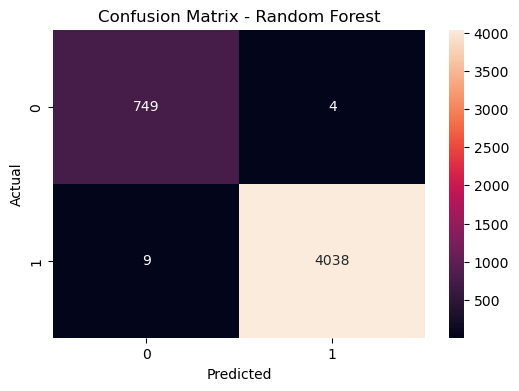

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()